In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

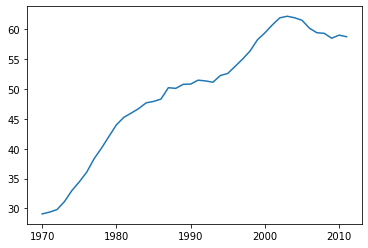

In [3]:
#visualizes the historical percentage of Biology degrees awarded to women:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

plt.plot(women_degrees["Year"], women_degrees["Biology"])
plt.show()

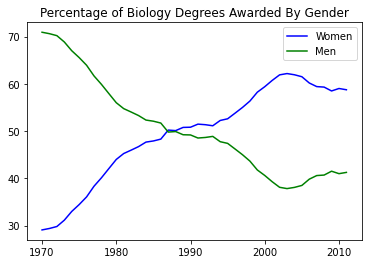

In [4]:
#Generate 2 line charts on the same figure use 100 - women_degrees to get percentage of men awarded bio degrees
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label="Women")
          
plt.plot(women_degrees['Year'],100-women_degrees['Biology'], c='green', label="Men")

plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")

Concepts: chart junk: https://en.wikipedia.org/wiki/Chartjunk
data ink ratio: https://infovis-wiki.net/wiki/Data-Ink_Ratio 
https://en.wikipedia.org/wiki/Edward_Tufte - https://www.edwardtufte.com/tufte/books_vdqi

axes.tick_params(): https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params
The parameters for enabling or disabling tick marks are conveniently named after the sides. To hide all of them, we need to pass in the following values for each parameter when we call Axes.tick_params():

    bottom: "off"
    top: "off"
    left: "off"
    right: "off"

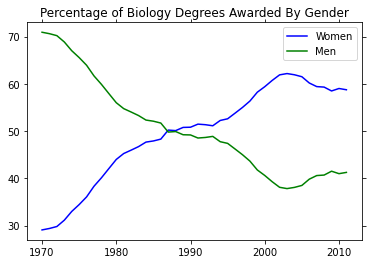

In [5]:
#Generate 2 line charts in the same plotting area:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100- women_degrees['Biology'], c='green', label='Men')

ax.tick_params(bottom='off', top='off', left='off', right='off')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")

plt.show()

Matlotlib spines class: https://matplotlib.org/api/spines_api.html 
If you run print(ax.spines), you'll get back a dictionary of the Spine objects:

{'right': <matplotlib.spines.Spine object at 0x111089c18>, 'bottom': <matplotlib.spines.Spine object at 0x111060898>, 'top': <matplotlib.spines.Spine object at 0x1110606a0>, 'left': <matplotlib.spines.Spine object at 0x11107cd30>}

To hide all of the spines, we need to:

    access each Spine object in the dictionary
    call the Spine.set_visible() method
    pass in the Boolean value False

The following line of code removes the spines for the right axis:

ax.spines["right"].set_visible(False)

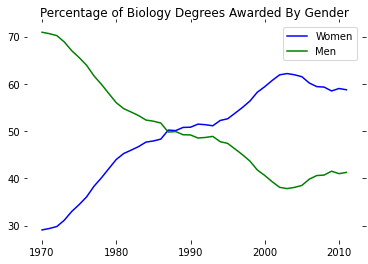

In [8]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(bottom="off", top="off", left="off", right="off")
# Add your code here
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
#remove ticks
ax.tick_params(bottom='off', top='off', right='off', left='off')
ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

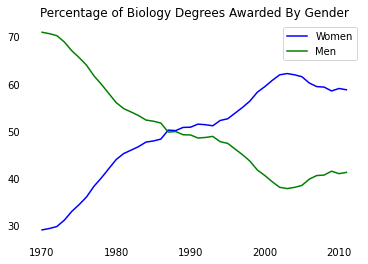

In [11]:
#there are still tick marks, faster way with for loop
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(bottom="off", top="off", left="off", right="off")
for key,spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom=False, top=False, right=False, left=False) #it is now a boolean value 
ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

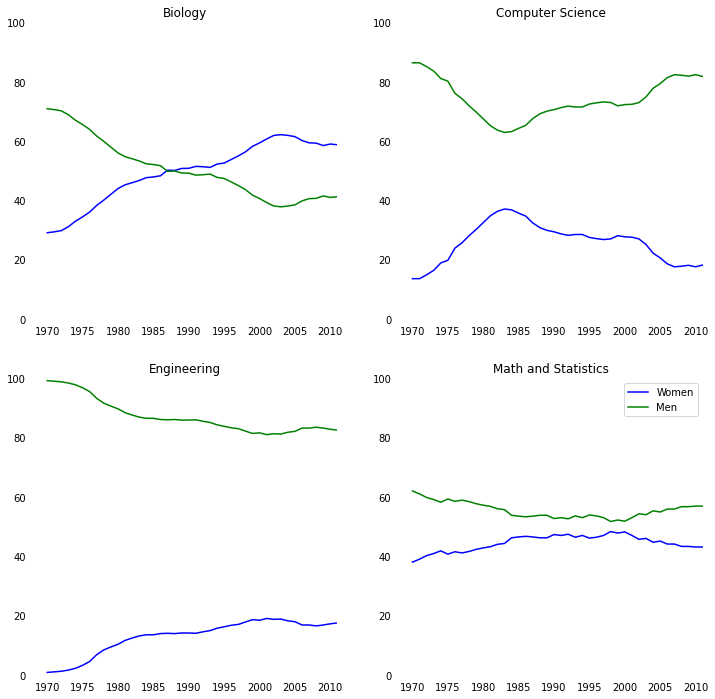

In [12]:
#generate multiple charts on a grid to compare 
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_title(major_cats[sp])
    # Add your code here.
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(bottom=False, top=False, right=False, left=False)
#for t in range(len(major_cats)):
 #   ax.set_title()
# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

<h3> Color layout and annotations

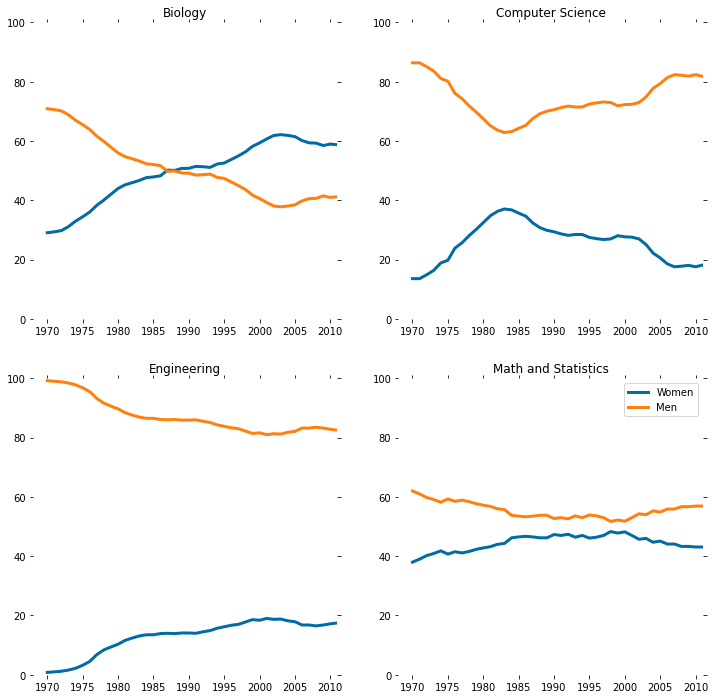

In [15]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

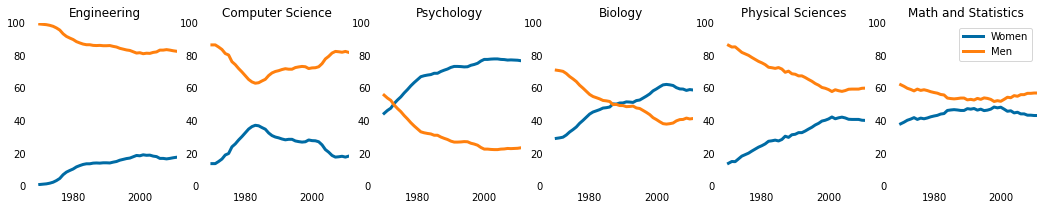

In [16]:
#put them all on one line and organize charts by the gender gap smaller as it the charts are further left
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

axes.text() method: matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.text
Allow you to add text in specific spots in the axes area

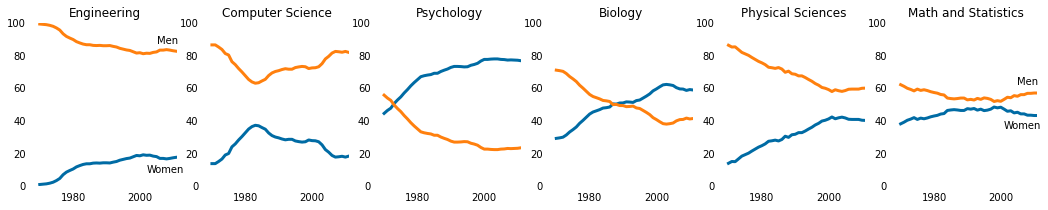

In [21]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    if sp == 5:
        ax.text(2005,62,'Men')
        ax.text(2001,35, 'Women')
plt.show()

<h1> Seaborn and Conditional Plots

In [22]:
titanic = pd.read_csv('train.csv')
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[cols].dropna()

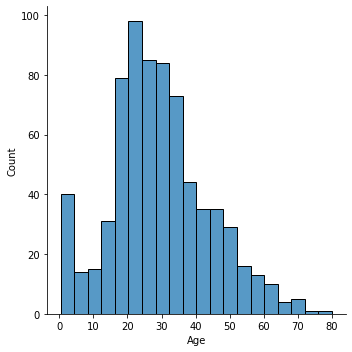

In [26]:
import seaborn as sns
sns.displot(titanic['Age']) #use displot instead distplot
plt.show()

Text(0.5, 0, 'Age')

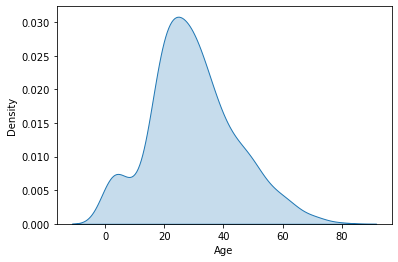

In [28]:
#create a shade and kernel density plot
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel("Age")

<h3> We can use the seaborn.set_style() function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

    darkgrid: Coordinate grid displayed, dark background color
    whitegrid: Coordinate grid displayed, white background color
    dark: Coordinate grid hidden, dark background color
    white: Coordinate grid hidden, white background color
    ticks: Coordinate grid hidden, white background color, ticks visible

Here's a diagram that compares the same plot across all styles:

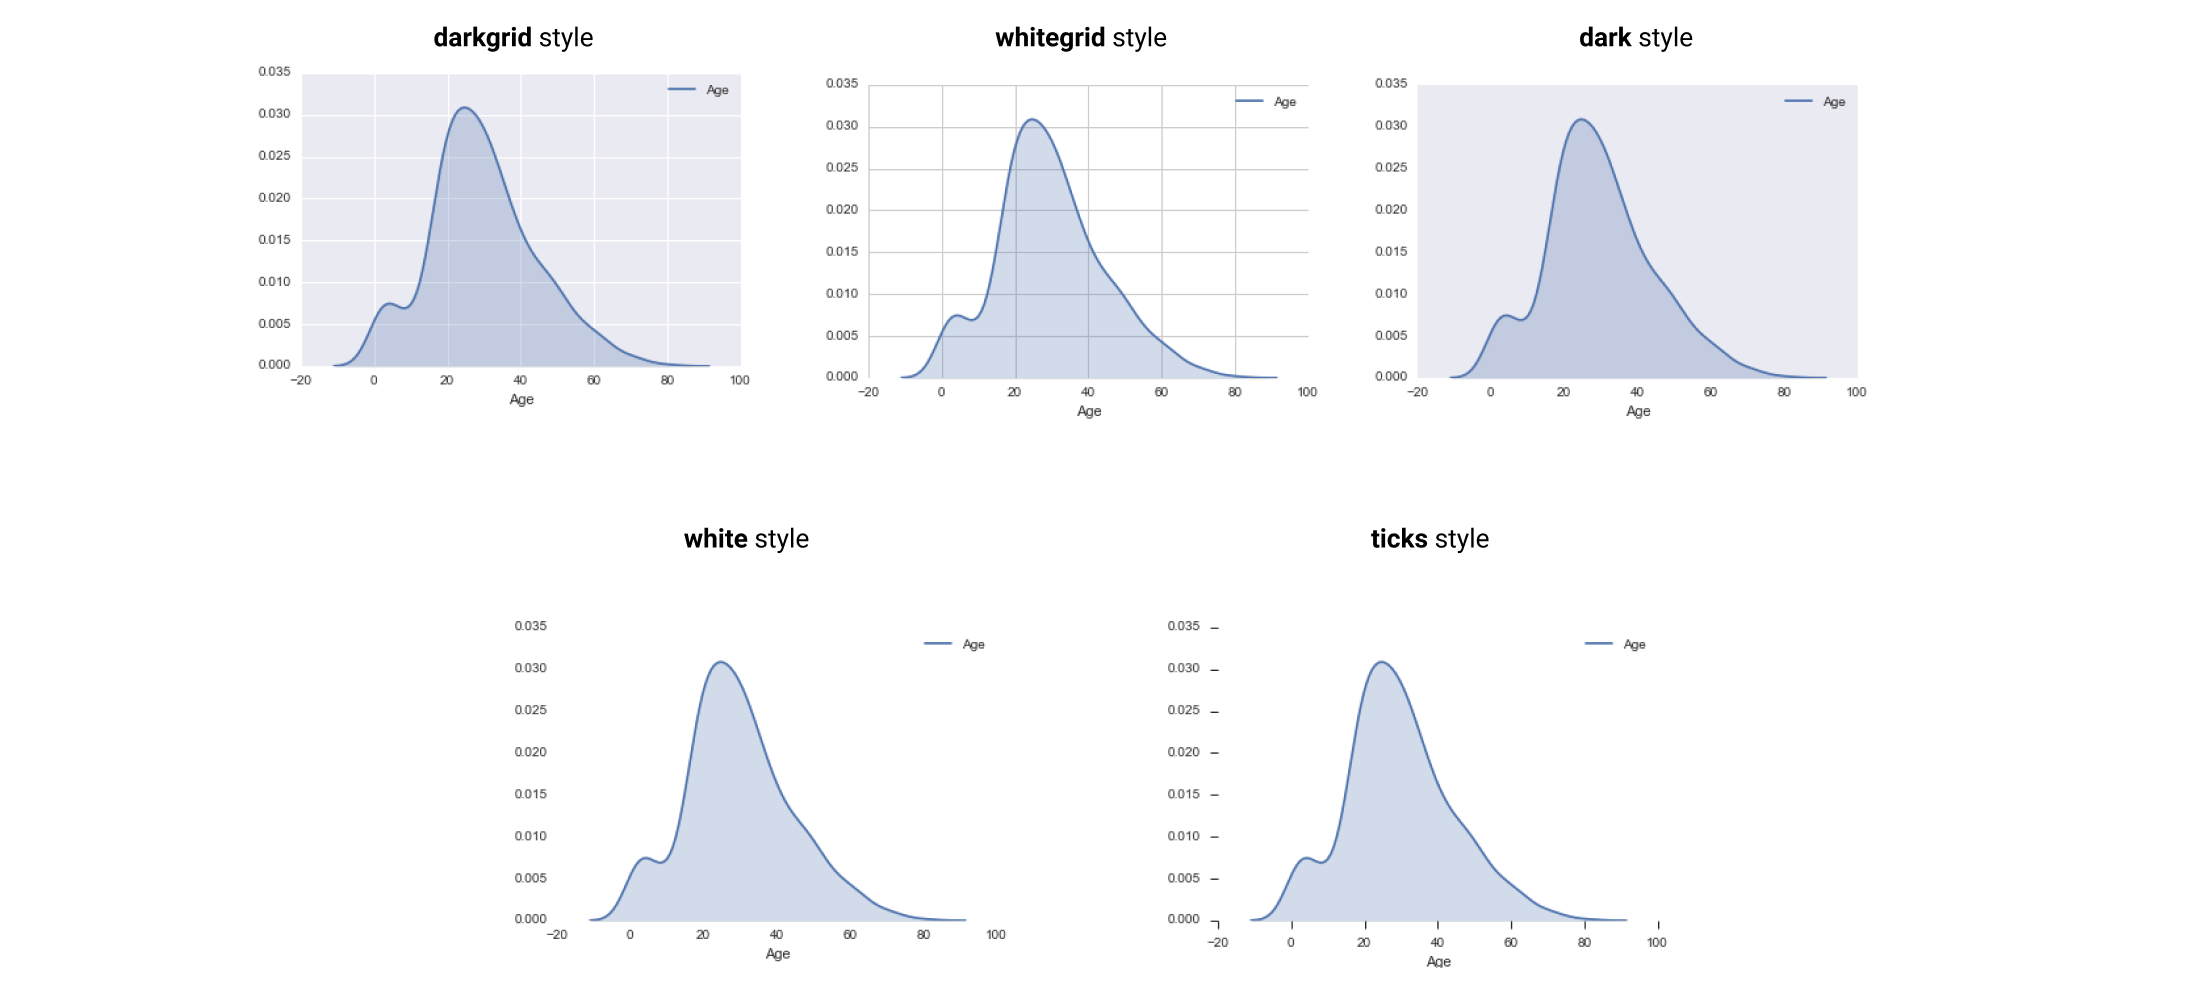

In [30]:
from IPython.display import Image
Image("seaborn_all_styles.png")

   <h3> Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
    Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
    Set the x-axis label to "Age".
    Despine all of the axes.

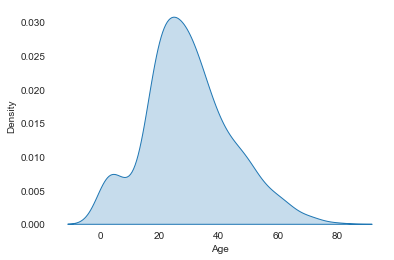

In [31]:
sns.set_style("white")
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
sns.despine(left=True, bottom=True)

<h3> In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the "Age" column where Survived equalled 0 and the other would visualize the distribution of values in the "Age" column where Survived equalled 1.

Seaborn handled:

    subsetting the data into rows where Survived is 0 and where Survived is 1
    creating both Axes objects, ensuring the same axis scales
    plotting both kernel density plots

 The seaborn.FacetGrid object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from FacetGrid is another word for "subset". Setting the col parameter to "Survived" specifies a separate plot for each unique value in the Survived column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the FacetGrid.map() method to specify the plot we want for each unique value of Survived. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into FacetGrid.map() has to be a valid matplotlib or seaborn function.

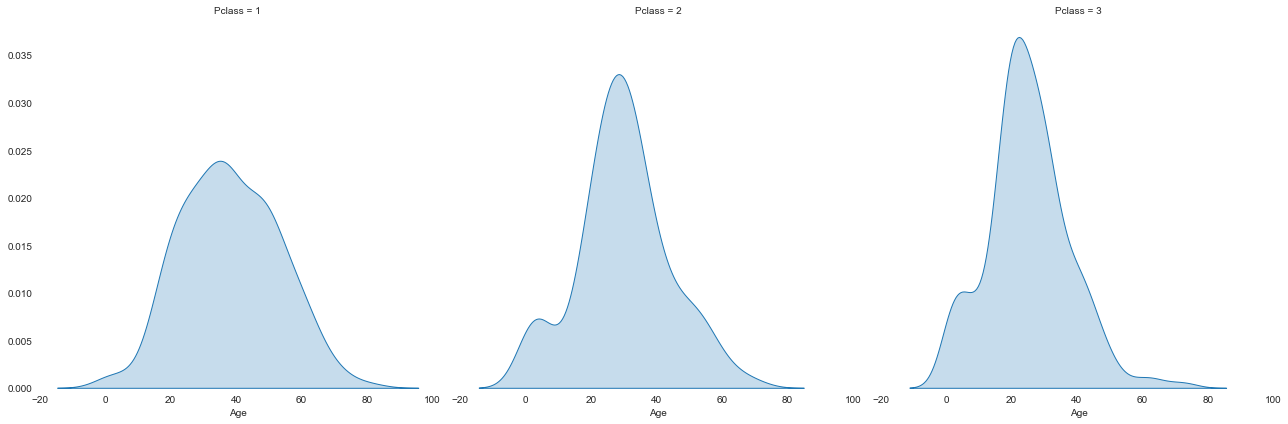

In [33]:
g = sns.FacetGrid(titanic, col="Pclass", height=6) #size is now called height
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a FacetGrid, we use the row parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.

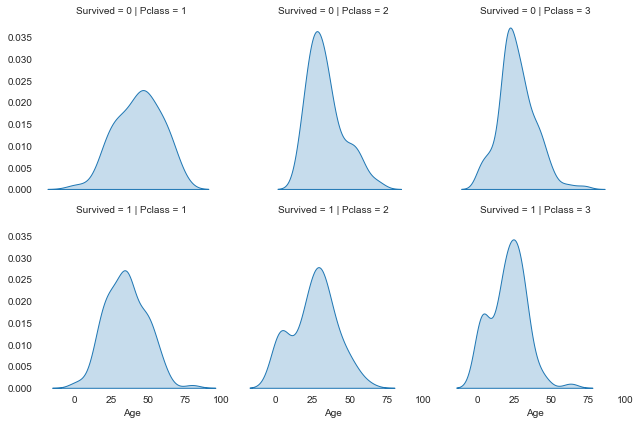

In [36]:
#play with this and change around some of the conditions - switch survived and pclass columns and you see they change the number of rows
g = sns.FacetGrid(titanic, col="Pclass", row="Survived")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the hue parameter to the column name from the dataframe.

Use a FacetGrid instance to generate a grid of plots using the following conditions:

    The Survived column across the columns in the grid.
    The Pclass column across the rows in the grid.
    The Sex column using different hues.

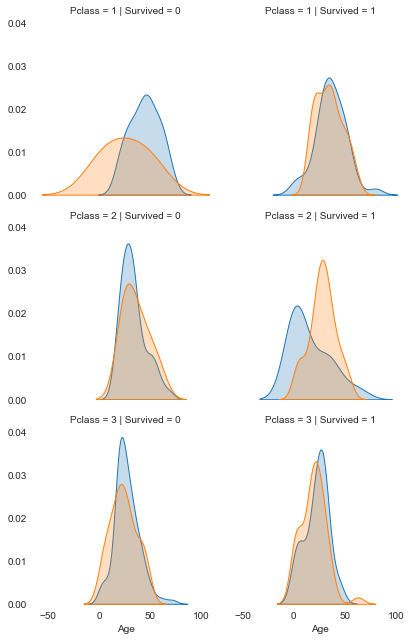

In [37]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex', height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

#see: http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
 #you can also use FacetGrid.map_dataframe(): and use dataframe instead of data set
g = sns.FacetGrid(tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill", "Tip")
g.add_legend()

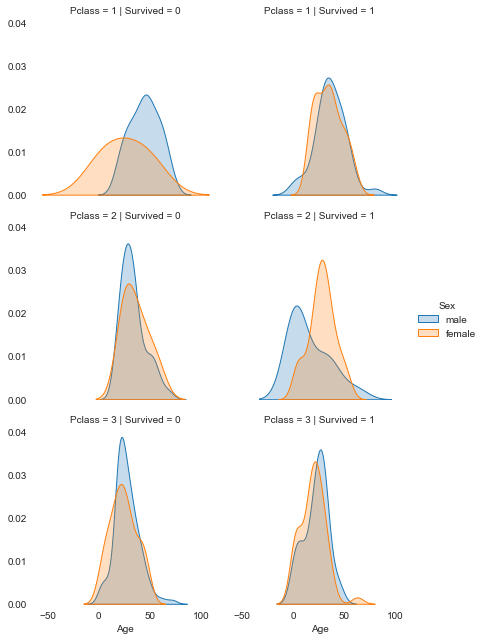

In [39]:
g = sns.FacetGrid(titanic, col='Survived', row='Pclass', hue="Sex", height=3)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend() #add legend before despining
sns.despine(left=True, bottom=True)
#g.set_axis_labels("Survived","Pclass")
plt.show()